# Simulate VT images

## Compute limiting magnitudes: compari

Compute the VT limiting magnitude for 5min exposure at 5 sigma.  

Information about VT are taken here: http://svom.bao.ac.cn/~yqiu/loop.html  

Result: not completly similar to their simualtor  

Problem: their document is not clear about the VT caracteristics they used. Need to perform the simulation with the same parameters

In [ ]:
%reload_ext autoreload
%autoreload 2

%matplotlib notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load os package, in order to get the environment variable pyETC_SIM
import os

In [ ]:
# Compute VT PSF FWHM from http://svom.bao.ac.cn/~yqiu/loop.html

# Variance of the Gaussians in arcseconds
sigma_optics=0.4
sigma_platform=0.4
# They have a requirement on thermo-elastic drift of 1"
# They say it is negligible, so we set it to 0" here
sigma_thermo_elastic=0

# All are gaussians so total is a simple quadratic sum
sigma_tot=np.sqrt(sigma_optics**2+sigma_platform**2+sigma_thermo_elastic**2)
FWHM_tot = 2 * np.sqrt(2*np.log(2)) * sigma_tot
print ('Total sigma VT: %.2f arcsec' % sigma_tot)
print ('Total PSF  FWHM VT: %.2f arcsec' % FWHM_tot)

In [4]:
# Load ETC package
from pyETC.pyETC import etc

# load ETC with a config file and the GFT caracteristics
VT_ETC=etc(configFile=os.getenv('ImSimpy_DIR')+'/ImSimpy/configFiles/VT.hjson',
           name_telescope='VT')

VT_ETC.information['channel']='VIS-B'
VT_ETC.information['filter_band']='blue'

VT_ETC.information['exptime']=100
VT_ETC.information['Nexp']=3

VT_ETC.information['etc_type']='mag'
VT_ETC.information['SNR']=5

VT_ETC.information['Fwhm_psf_opt'] = FWHM_tot
VT_ETC.information['radius_int_fwhm']=0.67

VT_ETC.information['seeing_zenith']=0  # Assume no seeing in space. Use only the PSF FWHM they give
VT_ETC.information['elevation']=90     # To compute an airmass of 1 (in space)
VT_ETC.information['moon_age']=14


In [5]:
VT_ETC.sim()


Information about Passband:
----------------------------
Cut_on: 3994 angstroms
Effective wavelength: 5329 angstroms
Cut_off: 6524 angstroms

Airmass: 1.00

Seeing: 0.00

MEAN EFFICENCIES:
------------------
Obscuration: 0.938
System: 0.59 (+obs: 0.555)

Zeropoint: 23.17 (AB mag)


For a total SNR=5.00 in a total exposure time of 300.00 (sec) in 3 exposure(s) we reach:

	 - a magnitude (AB system) of: 23.07 in blue band



For the central pixel a SNR=5.00 in a total exposure time of 300.00 (sec) in 3 exposure(s) we reach:


	 - a magnitude (AB system) of: 22.54 in blue band



Full well capacity of 1 pixel: 100000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 3 exposure(s) of 100.00 sec 
	by:
	- Object:              37.50   (electrons)
	- Sky:                 85.14   (electrons)
	- Readout:              6.00   (electrons)
	- Dark current:        10.00   (electrons)
	- Digitization:         0.35   (electrons)
	- Instrument bg:    

<IPython.core.display.Javascript object>


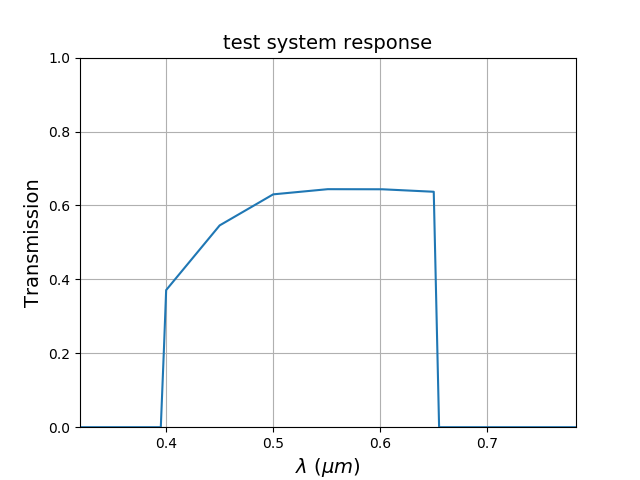

In [6]:
trans=VT_ETC.information['system_response']
# Plot systeme transmission
VT_ETC.plot_trans(trans,'system_transmision.png',title='test system response',ylabel='Transmission',
                   ylim=[0,1],wvl_unit='microns',passband_centered=True)

In [7]:
VT_ETC.information

OrderedDict([('sky_site', 'VT'),
             ('atmosphere_type', 'file'),
             ('ext_file', 'Space'),
             ('atm_file', 'Space'),
             ('D_M1', 0.4),
             ('D_M2', 0.1),
             ('M2_factor', 1),
             ('focal_length', OrderedDict([('VIS-B', 3.6), ('VIS-R', 3.6)])),
             ('Fwhm_psf_opt', 1.3320873778523166),
             ('detailed_trans', 0),
             ('filter_folder', 'VT'),
             ('cameras',
              OrderedDict([('VIS-B',
                            OrderedDict([('camera_type', 'e2v4280'),
                                         ('sensor', 'VT'),
                                         ('Nphotocell_X', 2048),
                                         ('Nphotocell_Y', 2048),
                                         ('Photocell_SizeX', 1.35e-05),
                                         ('Photocell_SizeY', 1.35e-05),
                                         ('ReadoutTime', 6),
                                      


# Compute Image

In [8]:
from ImSimpy.ImSimpy import ImageSimulator

VT_IS=ImageSimulator(configFile=os.getenv('ImSimpy_DIR')+'/ImSimpy/configFiles/VT.hjson',
                          name_telescope='VT')

#Read the configfile
VT_IS.readConfigs()

#execute it:
VT_IS.simulate()

Setting the random number generator seed: current time
Read config file and execute ETC


/home/dcorre/code/pyETC/pyETC/photometry.py:331: RuntimeWarning: divide by zero encountered in log10
  Mag=-2.5*np.log10(fluxJy/info_dict['Flux_zero_Jy'])



Information about Passband:
----------------------------
Cut_on: 6475 angstroms
Effective wavelength: 7743 angstroms
Cut_off: 8883 angstroms

Airmass: 1.50

Seeing: 0.82

MEAN EFFICENCIES:
------------------
Obscuration: 0.938
System: 0.51 (+obs: 0.482)

Zeropoint: 22.68 (AB mag)


A magnitude (AB system) of 18.11 in red band within a total exposure time of 30.00 seconds splited in 1 exposure(s), implies a total SNR of :

	 - Integrated SNR over 5 pixels: 34.03


A magnitude (AB system) of 18.11 in red band within a total exposure time of 30.00 seconds splited in 1 exposure(s), implies a SNR for the central pixel of of :


	 - SNR of the central pixel: 18.99 



Full well capacity of 1 pixel: 100000.00 (electrons)


--------- One pixel only------------------

Photo-electrons created: central pix for 1 exposure(s) of 30.00 sec 
	by:
	- Object:             424.68   (electrons)
	- Sky:                 36.22   (electrons)
	- Readout:              6.00   (electrons)
	- Dark current:       

GRB positionned at pixel coordinates (X,Y): 1024.00,1024.00 with mag= 18.11
	GENERATE PSF
PSF convolution
done
	ADD OBJECTS
Total number of objects in the input catalog = 8449
1982/8449 objects were placed on the detector
	Apply Shot noise
	Add Sky background
	Add Readout Noise
	Discretise
	Write outputs


In [9]:
fits_filename=os.getenv('ImSimpy_DIR')+'/ImSimpy/images/'+VT_IS.information['output']
print (fits_filename)

/home/dcorre/code/ImSimpy/ImSimpy/images/VT/image_VT.fits


<IPython.core.display.Javascript object>


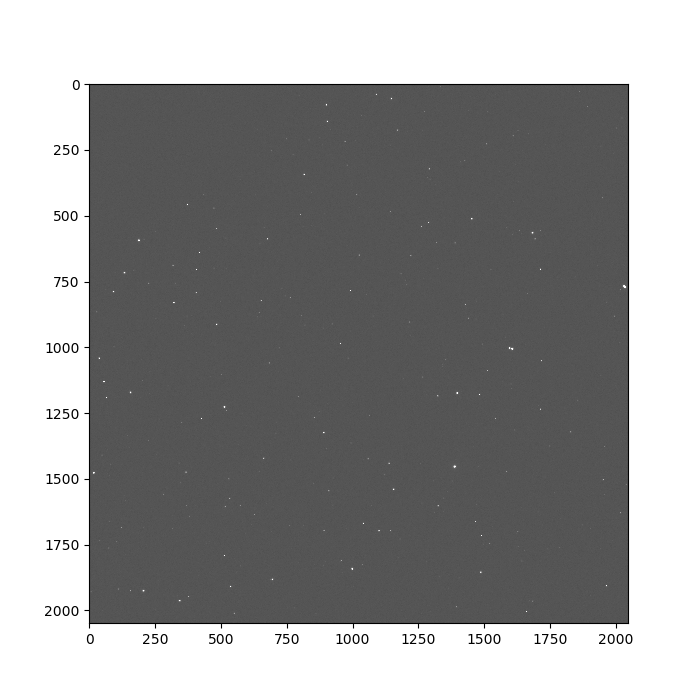

In [10]:
from astropy.io import fits

fits_file = fits.getdata(fits_filename)
image_mean = np.mean(fits_file)
image_std = np.std(fits_file)
vmin = image_mean - 5*image_std
vmax = image_mean + 10*image_std
plt.figure(figsize=(7,7))
plt.imshow(fits_file,interpolation='none',cmap='gray',vmin=vmin,vmax=vmax)

<IPython.core.display.Javascript object>


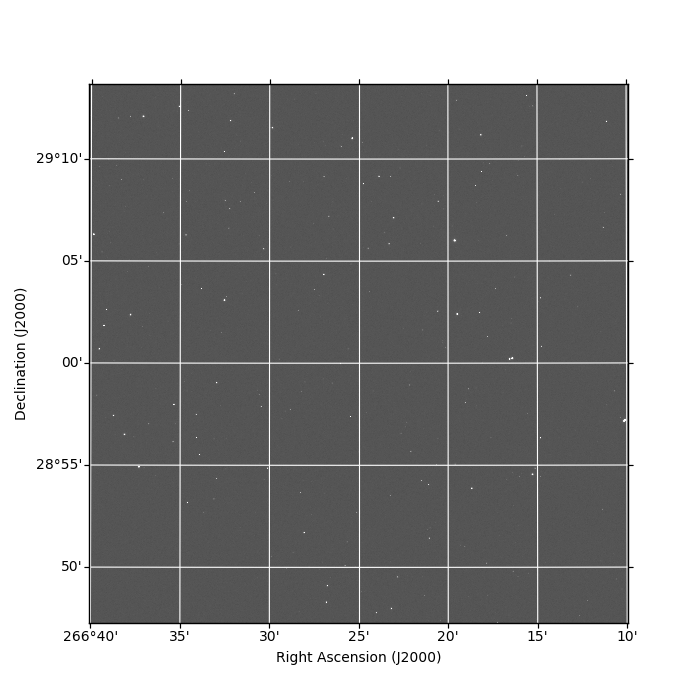

In [11]:
from astropy.wcs import WCS

image,header = fits.getdata(fits_filename,header=True)

wcs = WCS(header)
plt.figure(figsize=(7,7))

plt.subplot(projection=wcs)
plt.imshow(image,interpolation='none',cmap='gray',vmin=vmin,vmax=vmax,origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension (J2000)')
plt.ylabel('Declination (J2000)')